## I. Data Setting

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [ ]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Fri Nov 18 07:25:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W /  70W |    312MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

### 1) Google Drive Mount

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/face_data.zip'

-rw------- 1 root root 2500411368 Nov 17 05:49 '/content/drive/My Drive/Colab Notebooks/datasets/face_data.zip'


### 2) Unzip

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/face_data.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
         continuing with "central" filename version
  inflating: four_original_classes/neutral_original_image/162_ddce63cf979bcffe75e72eb7ab4eb802fe98e253e7cef396fce80a4fb8831c8b_여_20_중립_상업시설&점포&시장_20210204171343-003-004.jpg  
four_original_classes/neutral_original_image/163_03f84d01e35a8d2beed4c9467a82c212daa05809d0bc980865765fe6b0f2e9cd_남_20_중립_숙박 및 거주공간_20210201172559-010-004.jpg:  mismatching "local" filename (four_original_classes/neutral_original_image/163_03f84d01e35a8d2beed4c9467a82c212daa05809d0bc980865765fe6b0f2e9cd_ыВи_20_ьдСыж╜_ьИЩы░Х ы░П ъ▒░ьг╝ъ│╡ъ░Д_20210201172559-010-004.jpg),
         continuing with "central" filename version
  inflating: four_original_classes/neutral_original_image/163_03f84d01e35a8d2beed4c9467a82c212daa05809d0bc980865765fe6b0f2e9cd_남_20_중립_숙박 및 거주공간_20210201172559-010-004.jpg  
four_original_classes/neutral_original_image/164_777573a7e5358710c5d56335afbdbdbf7c4e61f4c6f77122675267720f909f3e_여_20_중립_숙박 및 거주공간_2021020

In [ ]:
!ls -l

total 16
drwx------ 5 root root 4096 Nov 18 06:48 drive
drwxr-xr-x 6 root root 4096 Nov 18 06:48 four_croppped_classes
drwxr-xr-x 6 root root 4096 Nov 18 06:49 four_original_classes
drwxr-xr-x 1 root root 4096 Nov 16 14:35 sample_data


## II. Data Preprocessing

### 1) split-folders로 이미지 데이터 분리하기
- 6 : 2 : 2

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

splitfolders.ratio('four_original_classes', output="split", seed=1337, ratio=(.6, 0.2,0.2)) 

Copying files: 3520 files [00:13, 261.71 files/s]


### 2) Image_File Directory Setting
- train_dir
- valid_dir
- test_dir

In [ ]:
train_dir = 'split/train' # /content/split/train
valid_dir = 'split/val'
test_dir  = 'split/test'

### 3) ImageDataGenerator( ) & flow_from_directory( )

#### Normalization
- ImageDataGenerator()

#### Resizing & Generator
- flow_from_directory()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지의 크기를 같게 만들어 준다 With normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir, 
                  target_size = (150, 150),
                  batch_size = 32, #
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 32,
                  class_mode = 'categorical')

Found 2112 images belonging to 4 classes.
Found 704 images belonging to 4 classes.


### 4) Test train_generator

In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (32, 150, 150, 3)
배치 레이블 크기: (32, 4)


### 5) Compare images

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# origianl image
origin_img = plt.imread("/content/split/train/angry_original_image/005_42f38c12577ba328f23ac4b46572a0ff91e24b00069f6da60ce80058e51a0117_여_20_분노_공공시설&종교&의료시설_20210208193122-001-013.jpg")

# resized image
train_angry_dir = train_dir = os.path.join('split/train', 'angry_original_image')
fnames = sorted([os.path.join(train_angry_dir, fname) for fname in os.listdir(train_angry_dir)])
img_path = fnames[0]

# 이미지 읽고 크기 변경
resize_img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(resize_img)

- images

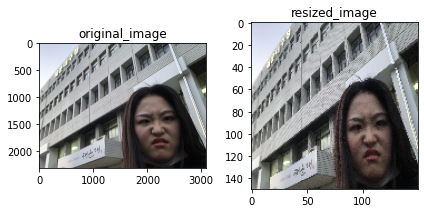

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("original_image")
ax1.imshow(origin_img)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("resized_image")
ax2.imshow(resize_img)

fig.tight_layout()
plt.show()

- shape

In [ ]:
print("original image shape: {}".format(origin_img.shape))
print("resized image shape: {}".format(x.shape))

original image shape: (2320, 3088, 3)
resized image shape: (150, 150, 3)


## III. CNN Keras Modeling

### 1) Model Define
- Feature Extraction & Classification

- Conv2D: 이미지일때 사용
  - 64 = filter의 개수 
  - 커널 사이즈 (=필터 사이즈): 3x3 kernel 2개를 사용하는 것이 5x5 kernel 1개를 사용하는 것보다 모델 파라미터 수가 더 적다. --> 3x3 효율적
  - 역전파 학습을 하기에 ReLu를 사용

- MaxPooling: 필터로 인해 커진 값을 가장 큰 값을 남기는 방식으로 줄여줌 
  - (3,3) = pool_size = 필터 사이즈와 같은 윈도우의 크기
  - 필터를 2칸씩 움직이며 줄여 준다 --> 학습을 빨리 하기 위해

- dropout: 트워크의 유닛(hidden layer)의 일부만 동작하고 일부는 동작하지 않도록 하는 방법으로 overfitting을 해소하기 위한 방법/ 컴퓨터 자원도 절약 가능

1. 150x150의 크기를 가지는 이미를 input으로 받는다
2. 한개의 150x150 이미지 입력값에 64개의 3x3필터를 사용하여 10개의 convolution 결과값을 만들어 낸다
3. 이 결과값에 activation fuction을 적용하여 첫번째 convolution layer을 만든다
4. maxpooling을 하여 각 결과값의 크기를 줄여준다
5. 두번째도 위와 같이 반복
6. 마지막 나온 결과값을 일자 형태의 데이터로 쭉 펼쳐준다


In [ ]:
import tensorflow.keras.layers as layers
from tensorflow.keras import models

model = models.Sequential()
### CNN Layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

### DNN Layer 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation = 'relu')) 
model.add(layers.Dense(units=4, activation = 'softmax')) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

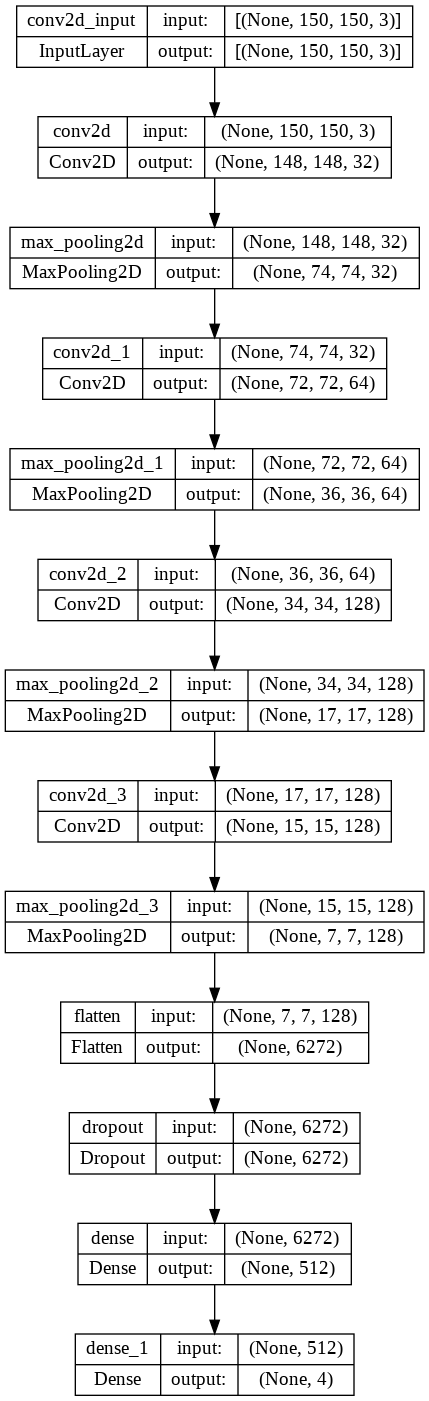

In [ ]:
from IPython.display import SVG
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

### 2) Model Compile
- 모델 학습방법 설정

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

### 3) Model fit
- 모델 학습 수행

In [ ]:
%%time
Hist_dandc = model.fit(train_generator, 
                       steps_per_epoch = int(2112 / 32),
                       epochs = 10, 
                       validation_data = valid_generator,
                       validation_steps = int(704/32)) 

Epoch 1/10
66/66 [==============================] - 234s 4s/step - loss: 1.3867 - accuracy: 0.2434 - val_loss: 1.3864 - val_accuracy: 0.2457
Epoch 2/10
66/66 [==============================] - 233s 4s/step - loss: 1.3866 - accuracy: 0.2424 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/10
66/66 [==============================] - 233s 4s/step - loss: 1.3873 - accuracy: 0.2306 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 4/10
66/66 [==============================] - 232s 4s/step - loss: 1.3870 - accuracy: 0.2543 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 5/10
66/66 [==============================] - 232s 4s/step - loss: 1.3874 - accuracy: 0.2301 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/10
66/66 [==============================] - 234s 4s/step - loss: 1.3865 - accuracy: 0.2401 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/10
66/66 [==============================] - 235s 4s/step - loss: 1.3865 - accuracy: 0.2424 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 8/10
66

### 4) 학습 결과 시각화
- Loss Visualization

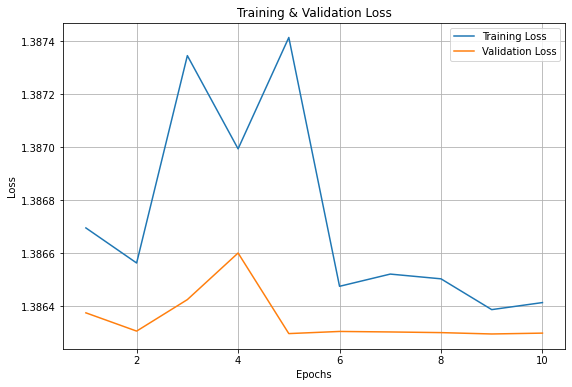

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

- Accuracy Visualization

Text(0.5, 0, 'Epochs')

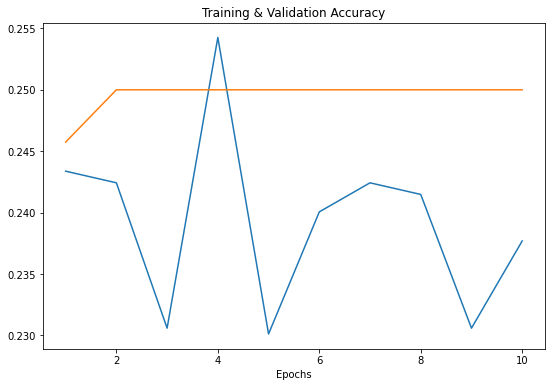

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')


### 5) Model Evaluate

- test_generator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'categorical')

Found 704 images belonging to 4 classes.


- Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

36/50 [====================>.........] - ETA: 23s - loss: 1.3863 - accuracy: 0.2500

50/50 [==============================] - 60s 1s/step - loss: 1.3863 - accuracy: 0.2500
Loss = 1.38630
Accuracy = 0.25000
